In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
passenger_ids = df["PassengerId"]

In [5]:
df = df[["Age", "Fare", "Sex", "SibSp", "Parch", "Pclass", "Embarked", "Survived"]]
df.head()

,Age,Fare,Sex,SibSp,Parch,Pclass,Embarked,Survived
0,22.0,7.2500,male,1,0,3,S,0
1,38.0,71.2833,female,1,0,1,C,1
2,26.0,7.9250,female,0,0,3,S,1
3,35.0,53.1000,female,1,0,1,S,1
4,35.0,8.0500,male,0,0,3,S,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Pclass    891 non-null    int64  
 6   Embarked  889 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
df.describe()

,Age,Fare,SibSp,Parch,Pclass,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594,2.308642,0.383838
std,14.526497,49.693429,1.102743,0.806057,0.836071,0.486592
min,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000,2.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000,3.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000,3.000000,1.000000
max,80.000000,512.329200,8.000000,6.000000,3.000000,1.000000


### Handling Missing Values

In [8]:
# Check for missing values
df.isna().sum()

Age         177
Fare          0
Sex           0
SibSp         0
Parch         0
Pclass        0
Embarked      2
Survived      0
dtype: int64

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [10]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df.isna().sum()

Age         0
Fare        0
Sex         0
SibSp       0
Parch       0
Pclass      0
Embarked    0
Survived    0
dtype: int64

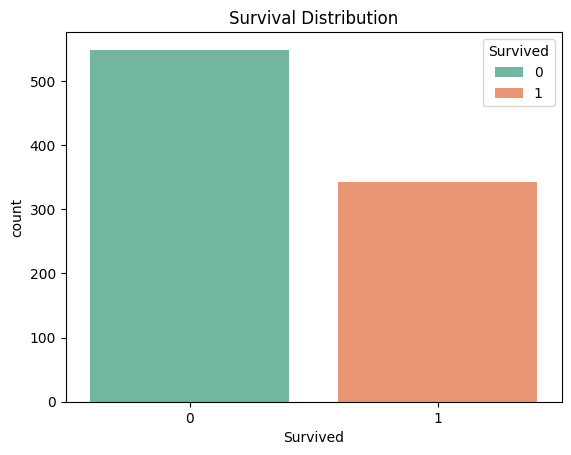

In [13]:
sns.countplot(x='Survived', data=df, hue= 'Survived',palette='Set2')
plt.title("Survival Distribution")
plt.show()

#### Survival by Gender

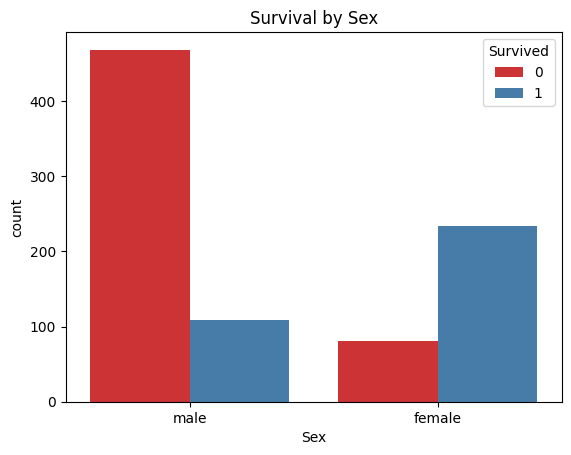

In [14]:
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title("Survival by Sex")
plt.show()

- A significantly larger proportion of males did not survive while only a small fraction of males survived.
- A relatively equal distribution of females survived and did not survive as indicated.

**Gender appears to be a strong predictor of survival.
Females had a much higher survival rate compared to males.**

#### Survival by Pclass

Text(0.5, 1.0, 'Survival by Passenger Class')

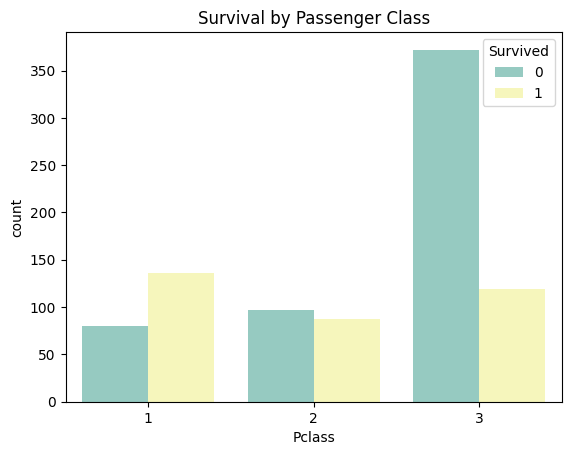

In [15]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set3')
plt.title("Survival by Passenger Class")

A large number of passengers from class 3 did not survive. Passengers mostly from class 1 survived.

#### Fare vs. Survival

Text(0.5, 1.0, 'Fare Distribution by Survival')

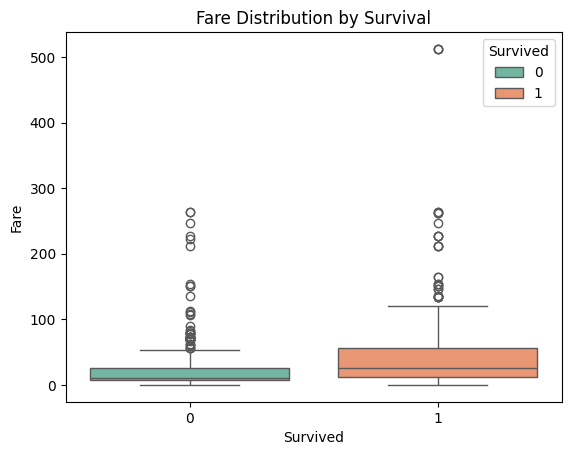

In [16]:
sns.boxplot(x='Survived', y='Fare', data=df, palette='Set2', hue= 'Survived')
plt.title("Fare Distribution by Survival")

Survivors tend to have paid higher fares.

Some outliers exist with very high fares (wealthy passengers).

#### Age Distribution by Survival

Text(0.5, 1.0, 'Age Distribution by Survival')

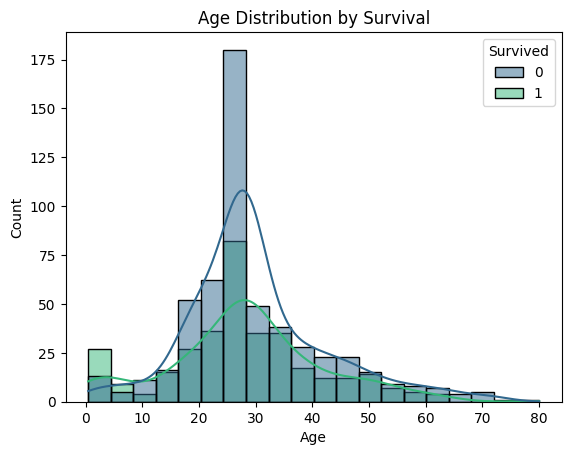

In [17]:
sns.histplot(df, x='Age', hue='Survived', kde=True, bins=20, palette='viridis')
plt.title("Age Distribution by Survival")

Younger passengers had a slightly better chance of survival.

Very few elderly passengers (above 65 years) survived.

#### Correlation Map

Text(0.5, 1.0, 'Correlation Heatmap')

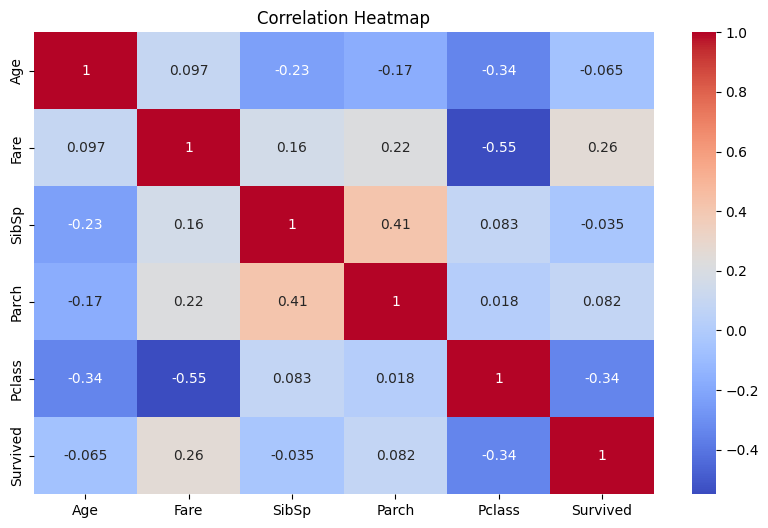

In [20]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Fare and Pclass are negatively correlated (expected — 1st class tickets cost more).

Sex (after encoding) is strongly correlated with Survived — gender played a crucial role.

#### Survival Vs Family Size

In [21]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


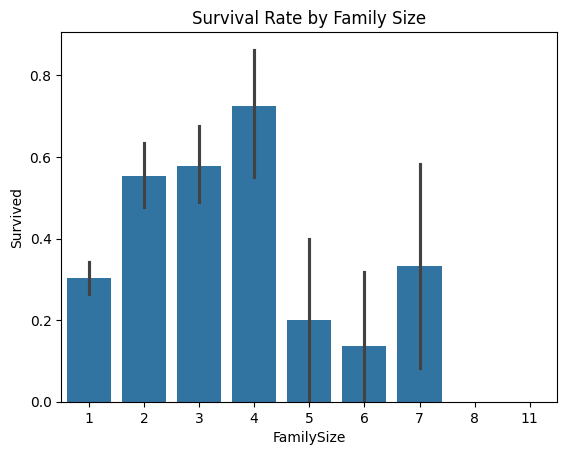

In [22]:
sns.barplot(data=df, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')
plt.show()


Medium-small families had the highest survival rates, with those in 4-person families showing the highest rate at about 73% survival.

Solo travelers (family size 1) had a relatively low survival rate of around 30%.

Very large families (8 and 11 members) appear to have had no survivors at all.

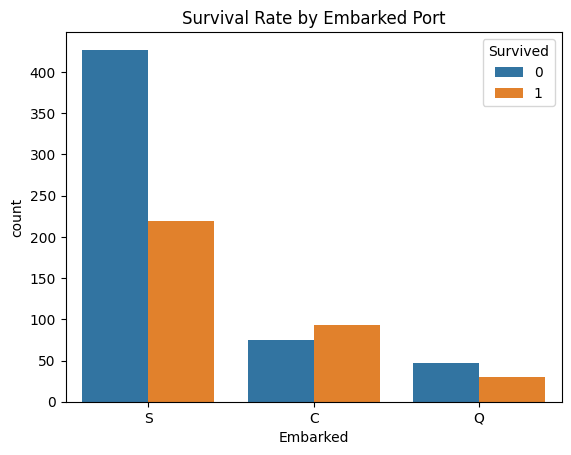

In [24]:
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival Rate by Embarked Port')
plt.show()


Most passengers boarded at port 'S'.

Passengers embarking from 'C' (Cherbourg) had a better survival rate compared to other ports.